### TODO
- Iniciar grabación
- Hacer gesto
- Detener grabacion
- Guardar video
- Generar dataframe

In [51]:
%load_ext autoreload
%autoreload 2

import mediapipe as mp
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import os
from utils.utils import generate_df_keynames, generate_empty_keypoints, process_video_keypoints

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
gesture_class = 'G'

In [105]:
#cap = cv2.VideoCapture('vocabulario_salud.mp4')
cap = cv2.VideoCapture(0)
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(width, height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = cap.get(cv2.CAP_PROP_FPS)
output_path = Path(f"collected/{gesture_class}.mp4")
writer = cv2.VideoWriter(str(output_path) , fourcc, round(fps), (width,height))
recording = False
while(True):
    ret, frame = cap.read()
    resized = cv2.resize(frame, (600, 400))
    
    cv2.putText(resized, f'CLASS: {gesture_class}'  # texto enunciado
                , (500, 75), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2, cv2.LINE_AA)
    
    cv2.imshow('Original', resized)
        
    if recording:
        writer.write(frame)
        
    k = cv2.waitKey(33)
    if k ==  ord("q"):
        break
    elif k == ord("s"):
        recording = True
        print('Recording started')
    elif k == ord("f"):
        recording = False
        writer.release()
        print(f'Recording saved at {output_path}')
        
cap.release()
cv2.destroyAllWindows()

640 480


In [99]:
gesture_class = 'G'

In [100]:
video_path = f"collected/{gesture_class}.mp4"
df = process_video_keypoints(video_path, gesture_class)
df.to_csv(f'collected/{gesture_class}.csv', index=False)

Procesando video collected/G.mp4
Video procesado


In [18]:
df

,frame,class,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z
0,1,C,0.266683,0.558449,2.387403e-07,0.310737,0.559350,-0.005751,0.355575,0.531068,...,0.025252,0.367786,0.694439,-0.078001,0.729048,1.044241,0.249619,0.134545,0.861538,-0.570450
1,2,C,0.261367,0.561889,3.246751e-07,0.307046,0.560197,-0.005436,0.352606,0.532112,...,-0.149742,0.372765,0.694922,-0.212226,0.728994,1.048836,0.055925,0.133200,0.861634,-0.684365
2,3,C,0.258192,0.562195,3.461286e-07,0.307273,0.559083,-0.000693,0.351643,0.530487,...,-0.187521,0.375450,0.694228,-0.238137,0.727450,1.065529,0.028136,0.132538,0.861148,-0.685462
3,4,C,0.257127,0.561990,3.395186e-07,0.305866,0.558750,-0.001701,0.350732,0.529729,...,-0.164818,0.377188,0.692512,-0.225635,0.724340,1.069417,0.047055,0.131751,0.859658,-0.687812
4,5,C,0.257224,0.561813,3.429091e-07,0.304973,0.558329,-0.002039,0.349819,0.529025,...,-0.183403,0.378181,0.691588,-0.256456,0.722344,1.068525,0.038399,0.131522,0.859382,-0.723563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,462,C,0.282474,0.553917,3.478833e-07,0.339050,0.548941,0.009855,0.383553,0.521088,...,0.057034,0.373328,0.710026,-0.275881,0.685290,1.105366,0.351244,0.127629,0.861353,-0.737423
462,463,C,0.278314,0.558846,3.363057e-07,0.336258,0.553070,0.009237,0.382630,0.522507,...,0.016919,0.373522,0.710811,-0.234258,0.686603,1.106458,0.297863,0.125257,0.861163,-0.704745
463,464,C,0.286049,0.542847,1.101290e-07,0.336360,0.538342,-0.002414,0.383507,0.511616,...,0.056812,0.371426,0.714158,-0.210578,0.686806,1.106247,0.349982,0.121327,0.860809,-0.701317
464,465,C,0.281464,0.559989,3.276947e-07,0.335709,0.550665,0.000157,0.381943,0.522643,...,0.071222,0.371737,0.713500,-0.188019,0.687162,1.105641,0.367372,0.122134,0.860447,-0.669594


## Unify gestures csv 

In [101]:
gestures_path = Path('alphabet_gestures')
unified_csv = pd.DataFrame()
for file in os.listdir(gestures_path):
    df_temp = pd.read_csv(os.path.join(gestures_path, file))
    unified_csv = pd.concat([unified_csv, df_temp])

In [102]:
unified_csv['class'].unique()

array(['E', 'I', 'C', 'D', 'A', 'H', 'B', 'F', 'G'], dtype=object)

In [103]:
unified_csv.to_csv('alphabet_gestures.csv', index=False)

<AxesSubplot: >

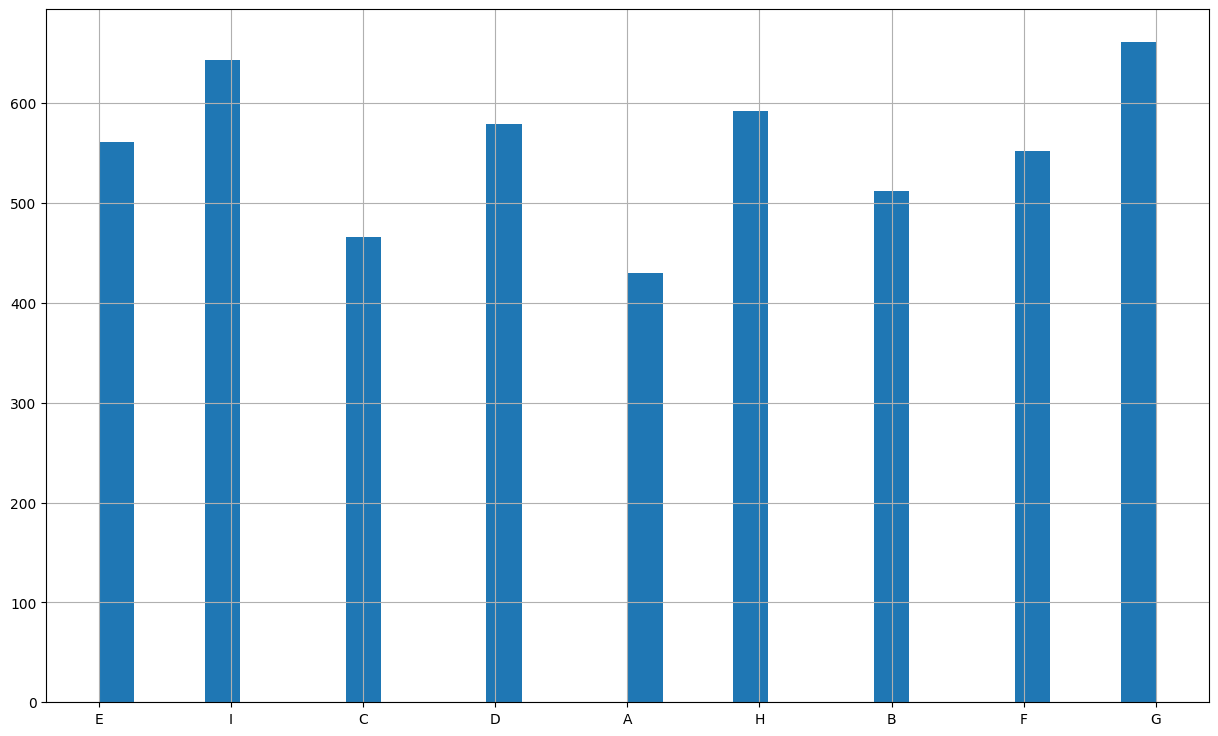

In [104]:
plt.figure(figsize=(15,9))
unified_csv['class'].hist(bins=30)